In [9]:
# 3_Model_Evaluation.ipynb

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the trained model
model = load_model('../model/traffic_sign_model.h5')

# Load preprocessed data
X_train = np.load('../data/X_train.npy')
X_test = np.load('../data/X_test.npy')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Predict on training data
y_pred_train = model.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_true_train_classes = np.argmax(y_train, axis=1)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Evaluate the model on train data
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0113
Test Accuracy: 99.72%
Test Loss: 0.0125
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9999 - loss: 0.0022
Train Accuracy: 99.97%
Train Loss: 0.0025


In [11]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.99      1.00      0.99       496
           2       1.00      1.00      1.00       450
           3       0.99      1.00      1.00       280
           4       1.00      1.00      1.00       418
           5       1.00      0.99      0.99       364
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00       278
           8       1.00      1.00      1.00       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16       1.00      1.00      1.00        90
   

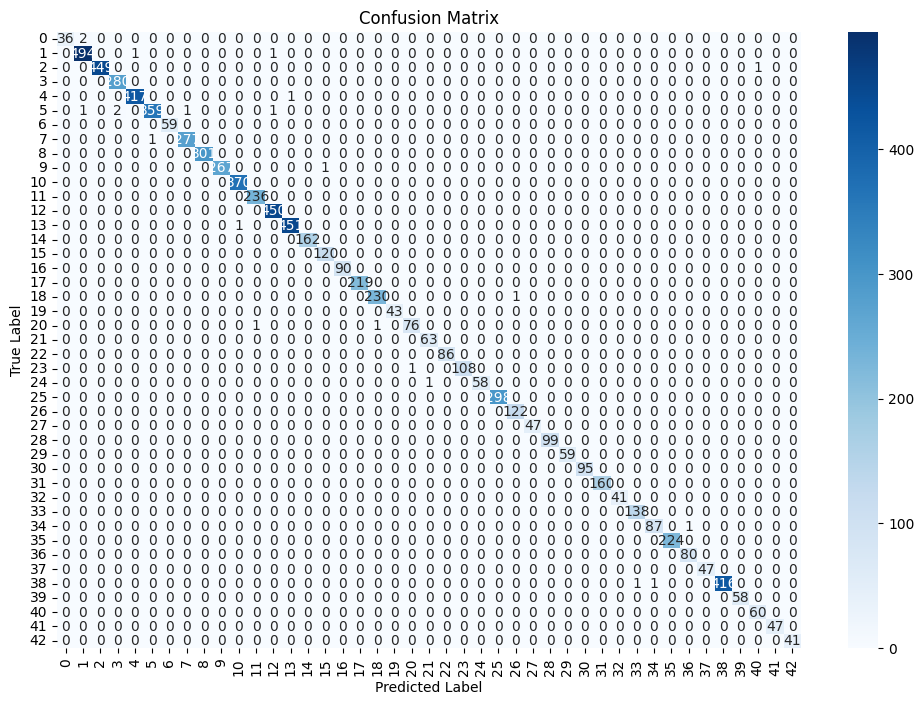

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(43), yticklabels=range(43))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()